# Figure S1E
## coverage stats for synthetic influenza data

### Necessary inputs: 
- cov_data.tsv
- flu.synthetic.afdata.csv
- maf_functions.R

#### Written by: Kate Johnson

In [1]:
# load necessary packages
suppressMessages({
library('plyr')
library('dplyr')
library('tidyverse')
library('ggplot2')
library('glue')
library("stringr")
})

In [2]:
message("set working directory and file names")

wkdir = "../synthetic_check/"

covreport = 'cov_data.tsv' # h1n1

af_report = 'flu.synthetic.afdata.csv' # h1n1


set working directory and file names



In [3]:
source(glue('{wkdir}/../scripts/maf_functions.R'))  # USER WILL NEED TO UPDATE PATH TO FUNCTIONS

In [4]:
message("Set working directory and read in sim data")

setwd(wkdir) 

cov = read.csv(covreport,header = T, sep = '\t')

cov$source_ID = str_replace(cov$name, '.fas_BWA', '')

af = read.csv(af_report,header = T) %>%
    select(sample, source_ID, copy_number, Rep) %>%
    unique()

af$MIX = str_extract(string = af$source_ID, pattern = "Mix[0-9]+")

# removing bad samples from analysis
remove_mix = c("Mix37", "Mix38", "Mix39", "Mix40", "Mix41", "Mix42", "Mix44")

levels(factor((af %>% filter(MIX %in% remove_mix))$sample))

sample_remove= c('0.0039_10^3_rep2',
                  '0.0078_10^3_rep2',
                  '0.0156_10^3_rep2',
                  '0.0313_10^3_rep2',
                  '0.0625_10^7_rep1',
                  '0.25_10^7_rep1',
                  '0.5_10^7_rep1',
                '0.5_10^3_rep2',
                '0.5_10^3_rep1')




Set working directory and read in sim data



[1] "0.0039_10^3_rep1" "0.0078_10^3_rep1" "0.0156_10^3_rep1" "0.0313_10^3_rep1"
[5] "0.0625_10^7_rep2" "0.25_10^7_rep2"   "0.5_10^7_rep2"

In [5]:
# min and max coverage across the positions/segments/samples: 
# filter data
grab_source_ids = (af %>% filter( !sample %in% sample_remove &
                    !MIX %in% remove_mix & 
                   copy_number != '10^7' ) %>% unique())$source_ID
# grab min and max
min((cov %>% filter(source_ID %in% grab_source_ids) %>% unique())$totalcount)
max((cov %>% filter(source_ID %in% grab_source_ids) %>% unique())$totalcount)

[1] 291

[1] 36983

In [6]:
cov = merge(cov, af, by = c('source_ID')) %>%
    filter( !sample %in% sample_remove &
                    !MIX %in% remove_mix & 
                   copy_number != '10^7' ) %>%
    unique() #filter and merge with metadata to make plots


# Figure S1E: Coverage of synthetic influenza data

Saving 7 x 4 in image


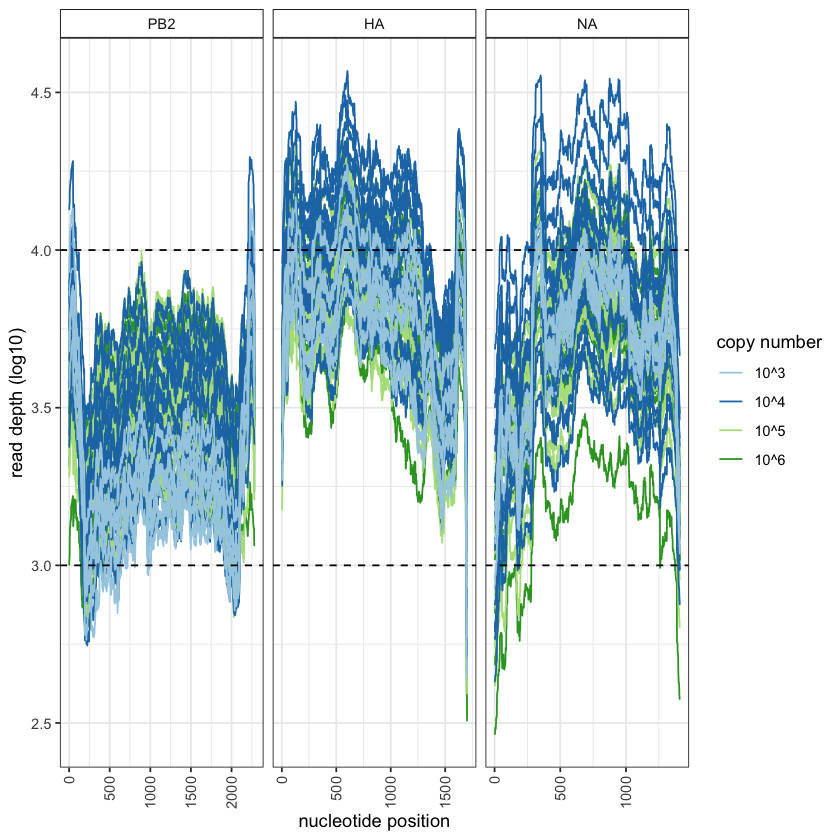

In [7]:
cov$segment = factor(cov$segment, levels = c('PB2','HA','NA'))

plots1e = ggplot(cov, aes(x=ntpos, y = log10(totalcount), color = factor(copy_number), group = source_ID)) + 
    geom_line() + 
    facet_grid(.~segment, scales ='free_x') +
    geom_hline(yintercept = log10(1000), linetype = 2, color = 'black') +
    geom_hline(yintercept = log10(10000), linetype = 2, color = 'black') +
    scale_color_brewer(palette = 'Paired') +
    labs(y='read depth (log10)', x= 'nucleotide position', color = 'copy number') + 
    PlotTheme1

print(plots1e)
ggsave(plots1e,
       filename = glue("{wkdir}/figS1E_kj.png"),
       width = 10,
       height = 4, limitsize=FALSE)

ggsave(plots1e,
       filename = glue("{wkdir}/figS1E_kj.pdf"),
       width = ,
       height = 4, limitsize=FALSE, useDingbats = FALSE)



In [8]:
af = read.csv(af_report,header = T) %>%
    select(sample, segment,source_ID, ntpos, cat) %>%
    unique()
af$SEGMENT = paste0('H1N1_', af$segment)
colnames(af)

af$MIX = str_extract(string = af$source_ID, pattern = "Mix[0-9]+")

head(af)
colnames(af)

cov2 = merge(cov, af, by = c('source_ID','ntpos'), all.x =TRUE) %>%
    unique()


[1] "sample"    "segment"   "source_ID" "ntpos"     "cat"       "SEGMENT"

,sample,segment,source_ID,ntpos,cat,SEGMENT,MIX
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,0.5_10^7_rep1,HA,000000000-K4LKV_l01_SynCon_Mix01_rep1,4,FN,H1N1_HA,Mix01
2,0.5_10^7_rep1,HA,000000000-K4LKV_l01_SynCon_Mix01_rep1,43,FP,H1N1_HA,Mix01
3,0.5_10^7_rep1,HA,000000000-K4LKV_l01_SynCon_Mix01_rep1,224,FP,H1N1_HA,Mix01
4,0.5_10^7_rep1,HA,000000000-K4LKV_l01_SynCon_Mix01_rep1,277,FP,H1N1_HA,Mix01
5,0.5_10^7_rep1,HA,000000000-K4LKV_l01_SynCon_Mix01_rep1,298,TP,H1N1_HA,Mix01
6,0.5_10^7_rep1,HA,000000000-K4LKV_l01_SynCon_Mix01_rep1,333,TP,H1N1_HA,Mix01


[1] "sample"    "segment"   "source_ID" "ntpos"     "cat"       "SEGMENT"  
[7] "MIX"

In [9]:
# read depth is higher in raw mpileup output
cov2 %>% 
    group_by(cat) %>%
    mutate(median_cov = median(totalcount),
          mean_cov = mean(totalcount)) %>%
    select(cat, median_cov, mean_cov) %>%
    unique()

cat,median_cov,mean_cov
<chr>,<dbl>,<dbl>
NA,4331.0,5398.543
TP,4825.0,5872.253
FN,3959.0,4989.075
FP,5342.0,6696.353
pre,3858.5,5441.868


In [10]:
mean_cov_across = cov %>%
            group_by(segment, ntpos) %>%
            mutate(mean_totalcount = mean(totalcount)) %>%
            ungroup() %>%
            select(segment, ntpos, mean_totalcount)

In [11]:
length(levels(factor(cov$source_ID)))
quantile(cov$totalcount)
quantile(cov$totalcount)[2][[1]]
quantile(cov$totalcount)[4][[1]]

[1] 54

0%   25%   50%   75%  100% 
  291  2598  4368  7158 36983

[1] 2598

[1] 7158

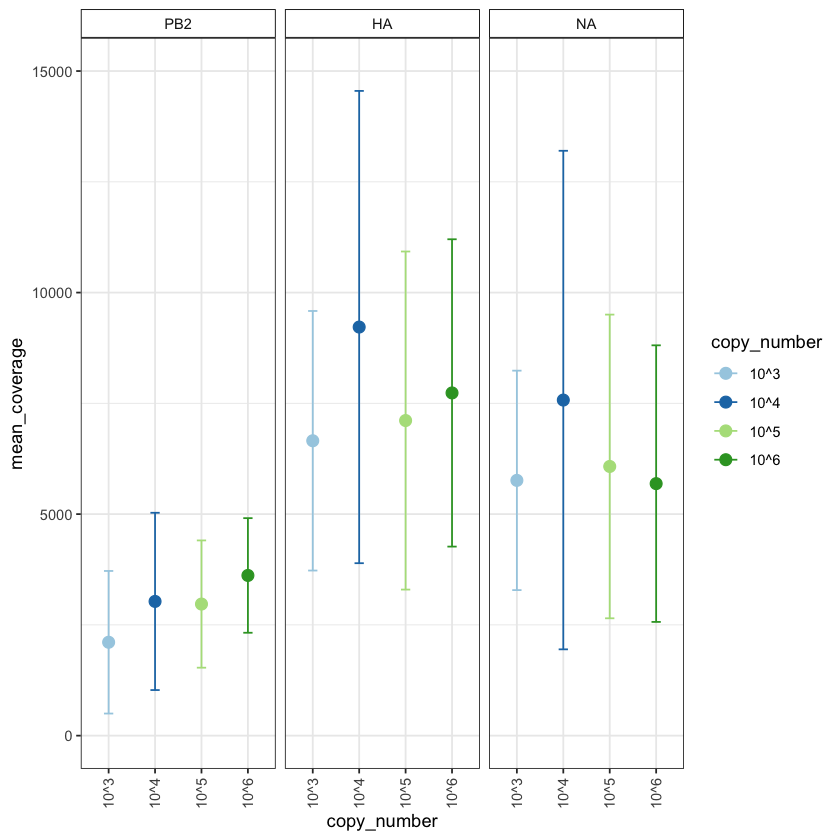

In [12]:
mean_cov = cov %>% 
            group_by(segment,copy_number) %>%
            mutate(mean_coverage = mean(totalcount),
                  sd_coverage = sd(totalcount),
                  median_coverage = median(totalcount), 
                  coverage_IQR = IQR(totalcount),
                  min_coverage = min(totalcount),
                  max_coverage = max(totalcount),
                  first_quart = quantile(totalcount)[2][[1]],
                  third_quart = quantile(totalcount)[4][[1]]) %>%
            ungroup() %>%
            select(segment, copy_number,
                  mean_coverage, sd_coverage, median_coverage,
                  coverage_IQR, min_coverage, max_coverage,
                  first_quart, third_quart) %>%
            unique()


ggplot(mean_cov, aes(x=copy_number, y = mean_coverage, color =  copy_number)) + 
    
    geom_errorbar(aes(ymin=mean_coverage - sd_coverage,
                      ymax=mean_coverage + sd_coverage), width = 0.2) +
    geom_point(size = 3) +
    PlotTheme1 + 
    ylim(0, 15000) +
    scale_color_brewer(palette = 'Paired') + 
    facet_grid(.~segment)




In [13]:
cov %>% 
            group_by(segment) %>%
            mutate(mean_coverage = mean(totalcount),
                  sd_coverage = sd(totalcount),
                  median_coverage = median(totalcount), 
                  coverage_IQR = IQR(totalcount),
                  min_coverage = min(totalcount),
                  max_coverage = max(totalcount),
                  first_quart = quantile(totalcount)[2][[1]],
                  third_quart = quantile(totalcount)[4][[1]]) %>%
            ungroup() %>%
            select(segment,
                  mean_coverage, sd_coverage, median_coverage,
                  coverage_IQR, min_coverage, max_coverage,
                  first_quart, third_quart) %>%
            unique()

segment,mean_coverage,sd_coverage,median_coverage,coverage_IQR,min_coverage,max_coverage,first_quart,third_quart
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
HA,7870.948,4257.607,7045,5311,320,36983,4730,10041
NA,6369.874,4130.526,5596,4709,291,35793,3510,8219
PB2,3083.054,1665.729,2763,2188,557,19727,1816,4004


In [14]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS/LAPACK: /opt/anaconda3/envs/renv/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] glue_1.6.2      forcats_0.5.2   stringr_1.5.0   purrr_0.3.5    
 [5] readr_2.1.3     tidyr_1.2.1     tibble_3.1.8    ggplot2_3.4.0  
 [9] tidyverse_1.3.2 dplyr_1.0.10    plyr_1.8.8     

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.9          lubridate_1.9.0     assertthat_0.2.1   
 [4] digest_0.6.31       utf8_1.2.2          IRdisplay_1.1      
 [7] R6_2.5.1            cellranger_1.1.0    repr_1.1.4         
[10] backports_1.4.1     reprex_2.0.2        evaluate_0.18      
[13] httr_1.4.4          pillar_1.8.1        rlang_1.0.6        
[16] googlesheets4_1.0.1 uuid_1.1